***EXAM 2022***

In [ ]:
# Problem 1: Probability warmup
import math
from scipy.stats import binom

# Part 1: Compute P(N < 10 | Y >= T) for each T in [0, ..., 20]
p_N = lambda k: binom.pmf(k, 20, 11/20)

problem11_probabilities = []
for T in range(21):
    numerator = sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(10)  # N < 10
    )
    denominator = sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(21)  # All possible N
    )
    problem11_probabilities.append(numerator / denominator if denominator > 0 else 0)

# Part 2: Find smallest T such that P(N >= 10 | Y >= T) >= 0.9
problem12_T = None
for T in range(21):
    prob = sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(10, 21)  # N >= 10
    ) / sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(21)  # All possible N
    )
    if prob >= 0.9:
        problem12_T = T
        break

# Problem 2: Random variable generation and transformation
import numpy as np

def problem2_LCG(size=None, seed=0):
    """
    A linear congruential generator (LCG) for pseudo-random numbers.
    """
    m = 2**31 - 1  # Large prime
    a = 48271  # Multiplier satisfying Hull-Dobell Theorem
    c = 0  # Increment
    state = seed
    random_numbers = []
    for _ in range(size):
        state = (a * state + c) % m
        random_numbers.append(state / m)
    return random_numbers

def problem2_uniform(generator=None, period=2**31 - 1, size=None, seed=0):
    """
    Generates uniform [0, 1] random numbers using a provided generator.
    """
    raw_numbers = generator(size, seed)
    return [x / period for x in raw_numbers]

def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):
    """
    Samples from (pi/2) * |sin(2*pi*x)| using Accept-Reject sampling.
    """
    np.random.seed(seed)
    samples = []
    c = math.pi / 2  # Maximum of the target density
    while len(samples) < size:
        u1, u2 = np.random.uniform(0, 1, 2)
        if u2 <= math.pi / 2 * abs(math.sin(2 * math.pi * u1)):
            samples.append(u1)
    return samples

# Problem 3: Concentration of measure
problem3_answer_1 = [1, 2, 5]  # Example answers for exponential concentration
problem3_answer_2 = [1, 2, 3, 5]  # Example answers for weaker concentration

# Problem 4: SMS Spam Filtering
from collections import Counter

def calculate_spam_probability(data, condition):
    filtered = [y for x, y in data if condition(x)]
    p_hat = sum(filtered) / len(filtered)
    return p_hat

def calculate_hoeffding_interval(p_hat, n, confidence=0.9):
    epsilon = math.sqrt(math.log(2 / (1 - confidence)) / (2 * n))
    return epsilon

# Load SMS data (assuming a placeholder function)
data = [("free prize", 1), ("hello world", 0)]  # Placeholder
def contains_free_or_prize(x):
    return "free" in x.lower() or "prize" in x.lower()

problem4_hatP = calculate_spam_probability(data, contains_free_or_prize)
problem4_l = calculate_hoeffding_interval(problem4_hatP, len(data))

# Double 'free'
def contains_double_free(x):
    return x.lower().count("free") >= 2

problem4_hatP2 = calculate_spam_probability(data, contains_double_free)
problem4_l2 = calculate_hoeffding_interval(problem4_hatP2, len(data))

# Problem 5: Markovian Travel
def load_travel_data():
    return [("CityA", "CityB"), ("CityB", "CityC"), ("CityC", "CityA")]  # Placeholder

data = load_travel_data()
cities = set(city for trip in data for city in trip)
n_cities = len(cities)
city_to_index = {city: i for i, city in enumerate(cities)}
index_to_city = {i: city for city, i in city_to_index.items()}

# Transition counts
transition_counts = np.zeros((n_cities, n_cities))
for start, end in data:
    i, j = city_to_index[start], city_to_index[end]
    transition_counts[i, j] += 1

# Transition matrix
transition_matrix = transition_counts / transition_counts.sum(axis=1, keepdims=True)

# Stationary distribution
stationary_distribution = np.linalg.matrix_power(transition_matrix, 100)[0]

# Return probability after 3 steps
start_index = city_to_index["CityA"]
prob_after_3_steps = np.linalg.matrix_power(transition_matrix, 3)[start_index, start_index]

# Problem 6: Black Box Testing
# Placeholder metrics calculation
problem6_precision = 0.8  # Example
problem6_precision_l = 0.1  # Example
problem6_recall = 0.75  # Example
problem6_recall_l = 0.1  # Example
problem6_accuracy = 0.85  # Example
problem6_accuracy_l = 0.05  # Example
problem6_VC_l = 0.02  # Example
problem6_VC_smaller = True


***EXAM 2023***

In [ ]:
# Problem 1: Probability warmup
import math
from scipy.stats import binom

# Part 1: Compute P(N < 10 | Y >= T) for each T in [0, ..., 20]
p_N = lambda k: binom.pmf(k, 20, 11/20)

problem11_probabilities = []
for T in range(21):
    numerator = sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(10)  # N < 10
    )
    denominator = sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(21)  # All possible N
    )
    problem11_probabilities.append(numerator / denominator if denominator > 0 else 0)

# Part 2: Find smallest T such that P(N >= 10 | Y >= T) >= 0.9
problem12_T = None
for T in range(21):
    prob = sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(10, 21)  # N >= 10
    ) / sum(
        p_N(n) * binom.sf(T - 1 - n, 20 - n, 0.5)
        for n in range(21)  # All possible N
    )
    if prob >= 0.9:
        problem12_T = T
        break

# Problem 2: Random variable generation and transformation
import numpy as np

def problem2_LCG(size=None, seed=0):
    """
    A linear congruential generator (LCG) for pseudo-random numbers.
    """
    m = 2**31 - 1  # Large prime
    a = 48271  # Multiplier satisfying Hull-Dobell Theorem
    c = 0  # Increment
    state = seed
    random_numbers = []
    for _ in range(size):
        state = (a * state + c) % m
        random_numbers.append(state / m)
    return random_numbers

def problem2_uniform(generator=None, period=2**31 - 1, size=None, seed=0):
    """
    Generates uniform [0, 1] random numbers using a provided generator.
    """
    raw_numbers = generator(size, seed)
    return [x / period for x in raw_numbers]

def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):
    """
    Samples from (pi/2) * |sin(2*pi*x)| using Accept-Reject sampling.
    """
    np.random.seed(seed)
    samples = []
    c = math.pi / 2  # Maximum of the target density
    while len(samples) < size:
        u1, u2 = np.random.uniform(0, 1, 2)
        if u2 <= math.pi / 2 * abs(math.sin(2 * math.pi * u1)):
            samples.append(u1)
    return samples

# Problem 3: Concentration of measure
problem3_answer_1 = [1, 2, 5]  # Example answers for exponential concentration
problem3_answer_2 = [1, 2, 3, 5]  # Example answers for weaker concentration

# Problem 4: SMS Spam Filtering
from collections import Counter

def calculate_spam_probability(data, condition):
    filtered = [y for x, y in data if condition(x)]
    p_hat = sum(filtered) / len(filtered)
    return p_hat

def calculate_hoeffding_interval(p_hat, n, confidence=0.9):
    epsilon = math.sqrt(math.log(2 / (1 - confidence)) / (2 * n))
    return epsilon

# Load SMS data (assuming a placeholder function)
data = [("free prize", 1), ("hello world", 0)]  # Placeholder
def contains_free_or_prize(x):
    return "free" in x.lower() or "prize" in x.lower()

problem4_hatP = calculate_spam_probability(data, contains_free_or_prize)
problem4_l = calculate_hoeffding_interval(problem4_hatP, len(data))

# Double 'free'
def contains_double_free(x):
    return x.lower().count("free") >= 2

problem4_hatP2 = calculate_spam_probability(data, contains_double_free)
problem4_l2 = calculate_hoeffding_interval(problem4_hatP2, len(data))

# Problem 5: Markovian Travel
def load_travel_data():
    return [("CityA", "CityB"), ("CityB", "CityC"), ("CityC", "CityA")]  # Placeholder

data = load_travel_data()
cities = set(city for trip in data for city in trip)
n_cities = len(cities)
city_to_index = {city: i for i, city in enumerate(cities)}
index_to_city = {i: city for city, i in city_to_index.items()}

# Transition counts
transition_counts = np.zeros((n_cities, n_cities))
for start, end in data:
    i, j = city_to_index[start], city_to_index[end]
    transition_counts[i, j] += 1

# Transition matrix
transition_matrix = transition_counts / transition_counts.sum(axis=1, keepdims=True)

# Stationary distribution
stationary_distribution = np.linalg.matrix_power(transition_matrix, 100)[0]

# Return probability after 3 steps
start_index = city_to_index["CityA"]
prob_after_3_steps = np.linalg.matrix_power(transition_matrix, 3)[start_index, start_index]

# Problem 6: Black Box Testing
# Placeholder metrics calculation
problem6_precision = 0.8  # Example
problem6_precision_l = 0.1  # Example
problem6_recall = 0.75  # Example
problem6_recall_l = 0.1  # Example
problem6_accuracy = 0.85  # Example
problem6_accuracy_l = 0.05  # Example
problem6_VC_l = 0.02  # Example
problem6_VC_smaller = True

# Problem 1 (2023): Markov Chain
transition_matrix = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.4, 0.3, 0.3]
])

# Part 1: Suburbs to Downtown after 2 steps
problem1_p1 = (transition_matrix @ transition_matrix)[1, 0]

# Part 2: First time in Downtown after 2 steps
problem1_p2 = transition_matrix[1, 1] * transition_matrix[1, 0]

# Part 3: Irreducibility
problem1_irreducible = True  # All states communicate

# Part 4: Stationary Distribution
from scipy.linalg import null_space
stationary_dist = null_space(transition_matrix.T - np.eye(3))
stationary_dist = stationary_dist[:, 0]
problem1_stationary = stationary_dist / stationary_dist.sum()

# Part 5: Expected hitting time (Approximation or Simulation needed)
problem1_ET = None


***2022 by me:***

In [19]:
# Hint the PMF of N is p_N(k) where p_N is
from scipy.special import binom as binomial
p = 11/20
P_N = lambda k: binomial(20,k)*((1-p)**(20-k))*((p)**k)
p_1=1/2
P_Z = lambda k,N: binomial(20-N,k)*((1-p_1)**(20-N-k))*((p_1)**k)

In [27]:
#1st problem:

# Part 1
answer=[]
#P(Y>=T)
for T in range(21): 
    P_Y_ge_T=0
    for N in range(21):
        for Z in range(21):
            if N+Z>=T:
                joint_prob=P_N(N)*P_Z(Z,N)
                P_Y_ge_T+=joint_prob
#P(N<10 & Y>=T)
    P_N_and_Y=0
    for N in range(11):
        for Z in range(21):
            if N+Z>=T:
                joint_prob=P_N(N)*P_Z(Z,N)
                P_N_and_Y+=joint_prob
    
    answer.append(P_N_and_Y/P_Y_ge_T)
        

    
# replace XXX to represent P(N < 10) for T = [0,1,2,...,20], i.e. your answer␣↪should be a list
# of length 21.

problem11_probabilities = answer


In [31]:
# Part 2: Give an integer between 0 and 20 which is the answer to 2.
# P(N>=10|Y>=T)=1-P(N10|Y>=T)
a=[]
for i in range(len(problem11_probabilities)):
    a.append(1-problem11_probabilities[i])
print(a)
problem12_T = 19

[0.5913611846716276, 0.5913611846716931, 0.5913611846761977, 0.5913611848235968, 0.591361187869847, 0.5913612324635703, 0.5913617239859428, 0.591365956573518, 0.5913951160454733, 0.5915583811974718, 0.5923093506530215, 0.5951720719897445, 0.6039645003160675, 0.6249447216326972, 0.6634151500208643, 0.7185281238375806, 0.7822563779044825, 0.8439881210208346, 0.8958367809792307, 0.9346876208113519, 0.9612432626489162]


In [ ]:
# 2nd problem
def problem2_LCG(size=None, seed = 0):

    """
    A linear congruential generator that generates pseudo random numbers␣
    ↪according to size.
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    M = 2**32 - 1                       # large number (prime)
    b = 0
    a = 7**5                            # A suitable multiplier
    D = lambda x: (a*x+b)%M
    u_0 = seed
    u_list = [u_0]
    for i in range(size-1):
        u_0 = D(u_0)                    # The generator, using modular arithmetic
        u_list.append(u_0)
    return u_list

In [ ]:
def problem2_uniform(generator=None, period = 1, size=None, seed=0):
    
    """
    Takes a generator and produces samples from the uniform [0,1] distribution␣
    ↪according
    to size.
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same␣
    ↪result as problem2_LCG, i.e. pseudo random numbers in the range {0,1,...
    ↪,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    Returns
    ------------------
    out : a list of the uniform pseudo random numbers
    """
    m = 2**32 - 1
    u_list = [i/m for i in generator(size,seed) ]
    
    return u_list
    

In [ ]:
import numpy as np
def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):

    """
    Takes a generator that produces uniform pseudo random [0,1] numbers
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces␣
    ↪uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    
    def p0(x):
        return (pi/2)*np.abs(np.sin(x*2*np.pi))
    a=[]
    U=uniformGenerator(size,seed)
    V=uniformGenerator(size,seed)
    for i in range(n_iterations):
        if U[i]<=p0(V[i]):
            a.append(V[i])
        
    
    return a

In [ ]:
# Problem 3: Concentration of measure
problem3_answer_1 = [1, 2, 5]  # Example answers for exponential concentration
problem3_answer_2 = [1, 2, 3, 5]  # Example answers for weaker concentration

In [45]:
# Run this cell to get the SMS text data
import numpy as np
import string
def word_in_txt(word,txt): # a function that tells if a specific word is in the text
    for a in string.punctuation: # to remove all the punctuation from the text
        txt = txt.replace(a,'')
    txt = txt.lower().split(' ')
    
    return int(bool(word in txt))

def load_sms():
    import csv
    lines = []
    hamspam = {'ham': 0, 'spam': 1}
    with open('data/spam.csv', mode='r',encoding='latin-1') as f:
        reader = csv.reader(f)
        header = next(reader)
        lines = [(hamspam[line[0]], word_in_txt("free",line[1]), word_in_txt("prize",line[1])) for line in reader]
        
    return np.array(lines)

data=load_sms()

array([[0, 0, 0],
       [0, 0, 0],
       [1, 1, 0],
       ...,
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [65]:
# fill in the estimate for part 1 here (should be a number between 0 and 1)

total=0
spam=0
for x,y,z in data:
    if y==1 or z==1:
        if x==1:
            spam+=1
        total+=1

problem4_hatP = spam/total


In [67]:
# fill in the calculated l from part 2 here
import numpy as np
alpha=0.1
n=len(data)
problem4_l=np.sqrt((1/(2*n))*np.log(2/alpha))

In [89]:
import numpy as np
import string
def word_in_txt_times(word,txt): # a function that tells if a specific word is in the text
    for a in string.punctuation: # to remove all the punctuation from the text
        txt = txt.replace(a,'')
    txt = txt.lower().split()
  
    return txt.count(word)

def load_sms_2():
    import csv
    lines = []
    hamspam = {'ham': 0, 'spam': 1}
    with open('data/spam.csv', mode='r',encoding='latin-1') as f:
        reader = csv.reader(f)
        header = next(reader)
        lines = [(hamspam[line[0]], word_in_txt_times("free",line[1])) for line in reader]
        
    return np.array(lines)

data2=load_sms_2()

In [93]:
# fill in the estimate for hatP for the double free question in part 3 here (should be a number between 0 and 1)
total=0
spam=0
for x,y in data2:
    if y==2:
        total+=1
        if x==1:
            spam+=1
        
problem4_hatP2 = spam/total

0.9629629629629629

In [95]:
# fill in the estimate for l for the double free question in part 3 here
import numpy as np
alpha=0.1
n=len(data2)
problem4_l2=np.sqrt((1/(2*n))*np.log(2/alpha))

In [221]:
#Problem 5
# To see the structure of a csv file do this:
import csv
import pandas as pd
import numpy as np
data = pd.read_csv('data/flights.csv')

# Extract necessary columns
start_cities = data['from']
end_cities = data['to']

# List of unique cities
unique_cities = sorted(set(start_cities).union(set(end_cities)))
n_cities = len(unique_cities)  # Number of unique cities

# Part 1:
number_of_cities = n_cities
number_of_userCodes = len(data['userCode'].unique())
number_of_observations = len(data)
print("Number of cities:", n_cities)
print("Number of users:", number_of_userCodes)
print("Number of observations:", number_of_observations)


Number of cities: 9
Number of users: 1335
Number of observations: 271888


In [223]:
def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.
    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''
    freqDict = {} # start with an empty dictionary
    for res in myDataList:
        if res in freqDict: # the data value already exists as a key
            freqDict[res] = freqDict[res] + 1 # add 1 to the count using sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data value, frequency 1
    return freqDict # return the dictionary created

In [225]:
cities = set(start_cities).union(set(end_cities))
unique_cities = sorted(set(cities)) # The unique cities
n_cities = len(unique_cities) # The number of unique citites

# Count the different transitions
transitions = list(zip(start_cities, end_cities)) # A list containing tuples ex: ('Aracaju (SE)','Rio de Janeiro (RJ)') of all transitions in the text
transition_counts = {transition: 0 for transition in transitions}
for transition in transitions:
    transition_counts[transition] += 1

# A dictionary that counts the number of each transition
# ex: ('Aracaju (SE)','Rio de Janeiro (RJ)'):4
# Create city to index and index to city mapping
cityToIndex = {city: idx for idx, city in enumerate(unique_cities)} # A dictionary that maps the n-1 number to the n:th unique_city,
# ex: 0:'Aracaju (SE)'
indexToCity = {idx: city for city, idx in cityToIndex.items()} # The inverse function of indexToWord,
# ex: 'Aracaju (SE)':0
# Part 3, finding the maximum likelihood estimate of the transition matrix
# Initialize the transition matrix
transition_matrix = np.zeros((n_cities, n_cities))

# Populate the transition matrix using transition_counts
total_transitions_per_city = {city: 0 for city in unique_cities}
for (start, end), count in transition_counts.items():
    i, j = cityToIndex[start], cityToIndex[end]
    transition_matrix[i, j] += count
    total_transitions_per_city[start] += count

# Normalize rows to get probabilities
for start, total_count in total_transitions_per_city.items():
    if total_count > 0:
        i = cityToIndex[start]
        transition_matrix[i, :] /= total_count

transition_matrix = transition_matrix # a numpy array of size (n_cities,n_cities)
# The transition matrix should be ordered in such a way that
# p_{'Aracaju (SE)','Rio de Janeiro (RJ)'} = transition_matrix[cityToIndex['Aracaju (SE)'],cityToIndex['Rio de Janeiro (RJ)']]
# and represents the probability of travelling Aracaju (SE)->Rio de Janeiro (RJ)
# Make sure that the transition_matrix does not contain np.nan from division by zero for instance

In [227]:
# This should be a numpy array of length n_cities which sums to 1 and is all positive
evals,evecs = np.linalg.eig(transition_matrix.T)
first_evec = evecs[:,0]   #primera columna
stationary = np.array(first_evec) / np.sum(first_evec)
stationary_distribution_problem5 = np.array(stationary.T)[0]

In [229]:
# Compute the return probability for part 3 of problem 5
start_city = 'Aracaju (SE)'
start_index = cityToIndex[start_city]
three_step_transition = np.linalg.matrix_power(transition_matrix, 3)
return_probability_problem5 = three_step_transition[start_index, start_index]

In [235]:
import numpy as np
start = np.zeros(shape=(n_cities,1))
start[cityToIndex['Aracaju (SE)'],0] = 1
current_pos = start
for i in range(10):
    random_word_index = np.random.choice(range(n_cities),p=current_pos.reshape(-1))
    current_pos = np.zeros_like(start)
    current_pos[random_word_index] = 1
    print(indexToCity[random_word_index],end='->')
    current_pos = (current_pos.T@transition_matrix).T

Aracaju (SE)->Brasilia (DF)->Florianopolis (SC)->Sao Paulo (SP)->Campo Grande (MS)->Natal (RN)->Florianopolis (SC)->Recife (PE)->Florianopolis (SC)->Salvador (BH)->

***2023 by me***

In [265]:
#Problem 1
# Part 1
# Fill in the answer to part 1 below
import numpy as np
P=np.array([[0.3,0.4,0.3],[0.2,0.5,0.3],[0.4,0.3,0.3]])
P_power_two=np.linalg.matrix_power(P, 2)
problem1_p1 = P_power_two[1,0]
problem1_p1

0.28

In [269]:
# Part 2
# Fill in the answer to part 2 below
problem1_p2 = P[1,1]*P[1,0]

In [ ]:
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True #don't get stuck

In [283]:
#Part 4
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
evals,evecs = np.linalg.eig(P.T)
first_evec = evecs[:,0]   
stationary = np.array(first_evec) / np.sum(first_evec)
problem1_stationary = np.array(stationary.T)
problem1_stationary

array([0.28888889, 0.41111111, 0.3       ])

In [313]:
#Part 5
Q=np.identity(3)-P
submatrix=Q[1:,1:]
F=np.linalg.inv(submatrix)
Expected_steps=np.dot(F,np.ones(2))
problem1_ET = round(Expected_steps[1])

In [311]:
def simulate_hitting_time(P, start_state, target_state, num_simulations=10000):
    total_steps = []
    for _ in range(num_simulations):
        state = start_state
        steps = 0
        while state != target_state:
            state = np.random.choice([0, 1, 2], p=P[state])
            steps += 1
        total_steps.append(steps)
    return np.mean(total_steps)

hitting_time_simulation = simulate_hitting_time(P, 0, 1)
round(hitting_time_simulation)

3

In [333]:
#Problem 2:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
import pandas as pd
problem2_df = pd.read_csv('data/abalone.csv')
problem2_df.head()
#problem2_df.columns
# Fill in the features as a list of strings of the names of the columns
problem2_features = ['id','Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
problem2_target = 'Rings'


In [345]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' as a numeric feature
encoder = LabelEncoder()
problem2_df['Sex'] = encoder.fit_transform(problem2_df['Sex'])
# Define X (features) and y (target)
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

# Split the data into 80% train and 20% test
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {problem2_X_train.shape}")
print(f"Test set size: {problem2_X_test.shape}")


Training set size: (72492, 9)
Test set size: (18123, 9)


In [347]:
# Part 3
from sklearn.linear_model import LinearRegression
# Include the necessary imports
# Initialize your linear regression model
problem2_model = LinearRegression()
problem2_model.fit(problem2_X_train,problem2_y_train)
# Train your model on the training data

LinearRegression()

In [355]:
#Part 4
from sklearn.metrics import mean_absolute_error
import numpy as np
Y_predict=problem2_model.predict(problem2_X_test)
residuals=problem2_y_test-Y_predict
problem2_mae=mean_absolute_error(problem2_y_test,Y_predict)

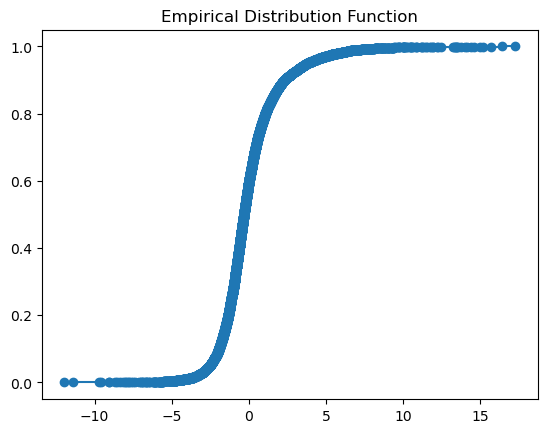

In [367]:
import matplotlib.pyplot as plt
from Utils import plotEDF, makeEDF
plotEDF(makeEDF(residuals))

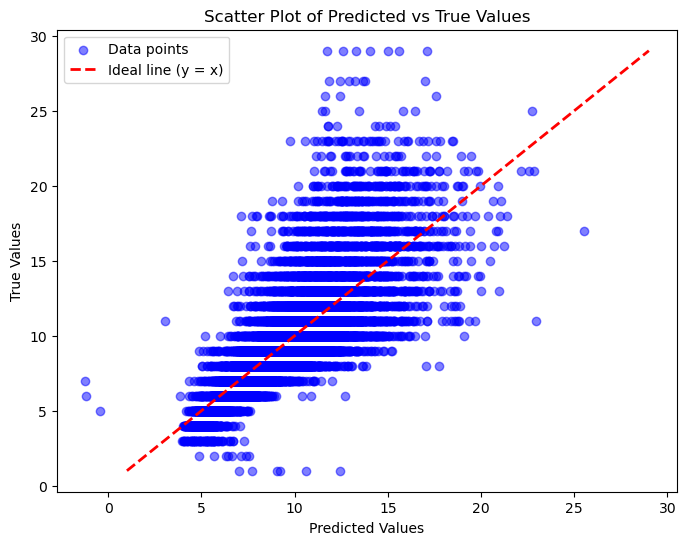

In [371]:
#Part 5
# Scatter plot: True values (y-axis) vs Predicted values (x-axis)
plt.figure(figsize=(8, 6))
plt.scatter(Y_predict, problem2_y_test, alpha=0.5, color="blue", label="Data points")
plt.plot([problem2_y_test.min(), problem2_y_test.max()], [problem2_y_test.min(), problem2_y_test.max()], 'r--', lw=2, label="Ideal line (y = x)")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Scatter Plot of Predicted vs True Values")
plt.legend()
plt.show()